In [1]:
import sys, math, os
import numpy as np
from numpy import abs, log, rot90, hstack, fft, copy, vstack, ones, zeros, invert
from numpy.fft import fftshift, fft2
from skimage import io, util, color, data, filters, img_as_ubyte, transform, img_as_float, exposure
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb, rgb2gray
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from scipy.ndimage import filters, sobel
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from collections import defaultdict
from scipy import misc
from skimage import morphology, draw
from scipy.ndimage.morphology import binary_hit_or_miss
from math import sqrt

/home/nive/.local/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from uint8 to bool
  .format(dtypeobj_in, dtypeobj_out))


(821, 492, 3)


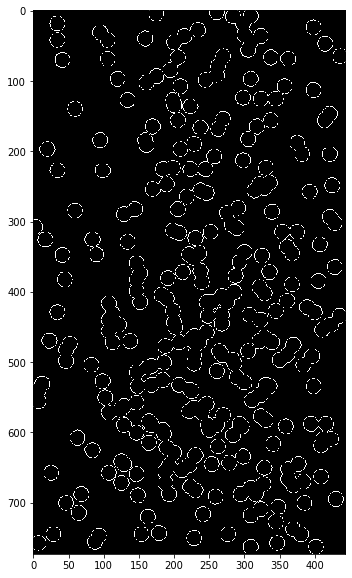

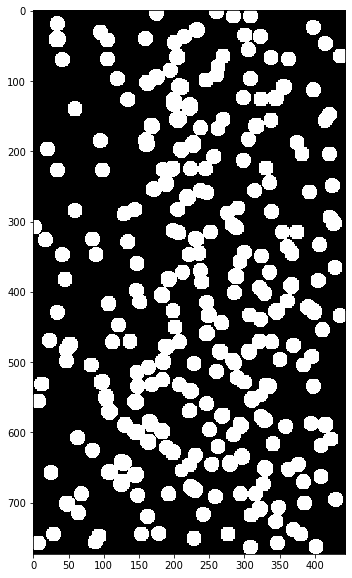

In [2]:
coins = imread('coins.jpg','uint8')


coins = util.img_as_bool(coins)
res = morphology.binary_erosion(coins, selem=morphology.disk(1))
edges = coins ^ res
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap="gray")

hough_res = transform.hough_circle(edges, [10, 11, 12])
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, [10, 11, 12],total_num_peaks=600)

fig, ax = plt.subplots(figsize=(10, 10))
image = np.zeros((coins.shape[0] + 48, coins.shape[1] + 48, 3), dtype=np.uint8)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = draw.circle(center_y + 24, center_x + 24, radius)
    image[circy, circx, :] = [255, 255, 255]

ax.imshow(image[24:-24, 24:-24, :], cmap="gray")
print(image.shape)
plt.show()

## Coins Touching the Boundary:

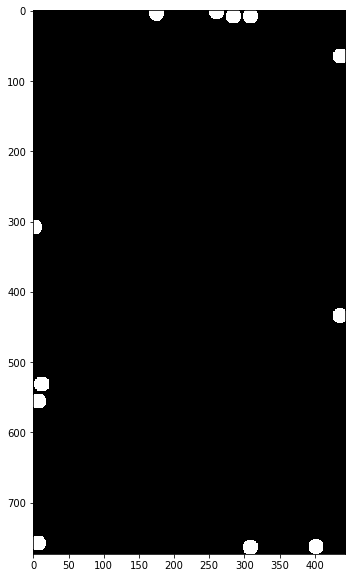

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
image = np.zeros((coins.shape[0] + 48, coins.shape[1] + 48, 3), dtype=np.uint8)
for center_y, center_x, radius in zip(cy, cx, radii):
    if (center_x - radius) <= 1 or (center_x + radius) >= (coins.shape[1]-1) or (center_y - radius) <= 1 or (center_y + radius) >= (coins.shape[0]-1):
        circy, circx = draw.circle(center_y + 24, center_x + 24, radius)
        image[circy, circx] = (255, 255, 255)
    
ax.imshow(image[24:-24, 24:-24, :], cmap="gray")
plt.show()

## Overlapping Coins:

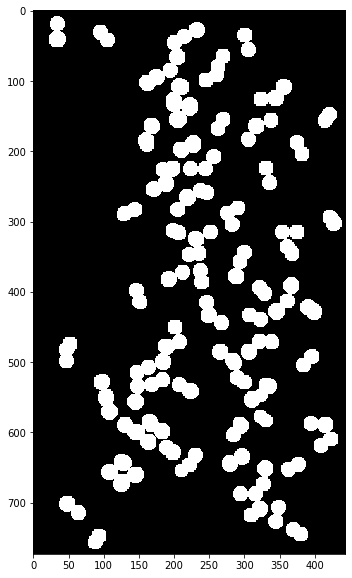

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
image = np.zeros((coins.shape[0] + 48, coins.shape[1] + 48, 3), dtype=np.uint8)

loner = []

for center1_y, center1_x, radius1 in zip(cy, cx, radii):
    flag = 0
    for center2_y, center2_x, radius2 in zip(cy, cx, radii):
        if abs(center1_x - center2_x) <= 7 and abs(center1_y - center2_y) <= 7:
            continue
        sum_rad = radius1 + radius2
        dist = sqrt((center1_x - center2_x)**2 + (center1_y - center2_y)**2)
        if dist < sum_rad:
            flag = 1
            circ1y, circ1x = draw.circle(center1_y + 24, center1_x + 24, radius1)
            image[circ1y, circ1x] = (255, 255, 255)
            circ2y, circ2x = draw.circle(center2_y + 24, center2_x + 24, radius2)
            image[circ2y, circ2x] = (255, 255, 255)
            break
    if flag == 0:
        loner.append((center1_x, center1_y, radius1))
        
ax.imshow(image[24:-24, 24:-24, :], cmap="gray")
plt.show()

## Non-Overlapping Coins:

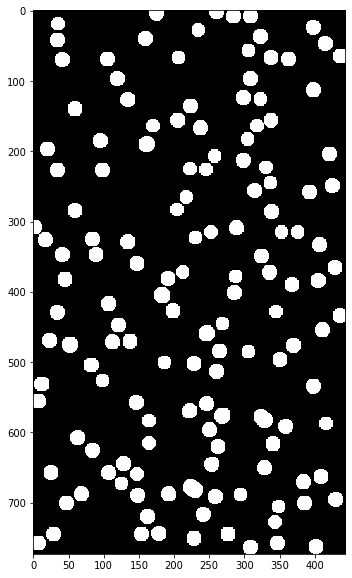

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
image = np.zeros((coins.shape[0] + 48, coins.shape[1] + 48, 3), dtype=np.uint8)

for c_x, c_y, rad in loner:
    circy, circx = draw.circle(c_y + 24, c_x + 24, rad)
    image[circy, circx] = (255, 255, 255)
    
ax.imshow(image[24:-24, 24:-24, :], cmap="gray")
plt.show()